In [53]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

In [4]:
df  = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv',index_col=False)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Univariate Analysis using Panada Profiling

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [6]:
profile.to_file("Analysis_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
## After analysis few colums are consts so droping them like [EmployeeCount,Over18,StandardHours], No Data missing
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [22]:
X,y = df.drop(['Attrition','EmployeeNumber'],axis=1), np.where(df.Attrition=='Yes',1,0)
X.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
830,41,Travel_Rarely,167,Research & Development,12,4,Life Sciences,2,Male,46,...,3,1,1,6,4,3,1,0,0,0


## Validating the data for normal distribution for Numerical colums

In [47]:
xn = X[num_cols]
xn.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole
0,41,1102,1,94,5993,19479,8,11,8,5,0,4
1,49,279,8,61,5130,24907,1,23,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,0,3,7
4,27,591,2,40,3468,16632,9,12,6,2,2,2


In [48]:
num_cols=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
pt = PowerTransformer()
xd = pt.fit_transform(xn)
xd = pd.DataFrame(xn,columns=num_cols)
xd.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole
0,41,1102,1,94,5993,19479,8,11,8,5,0,4
1,49,279,8,61,5130,24907,1,23,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,0,3,7
4,27,591,2,40,3468,16632,9,12,6,2,2,2


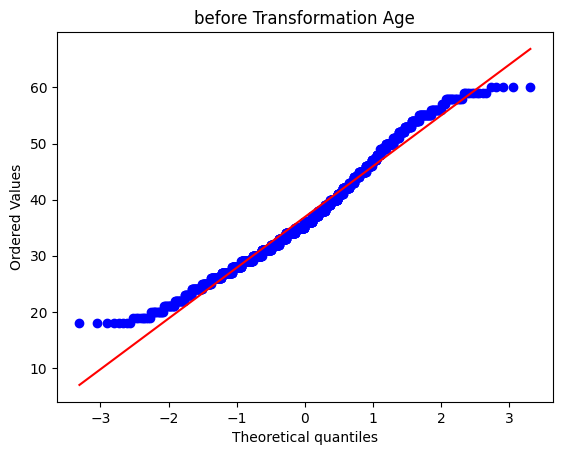

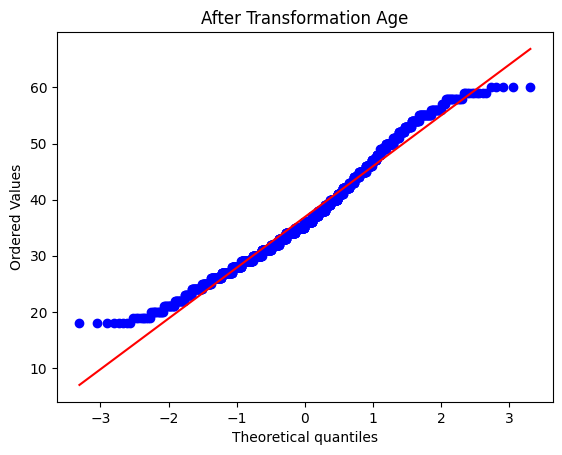

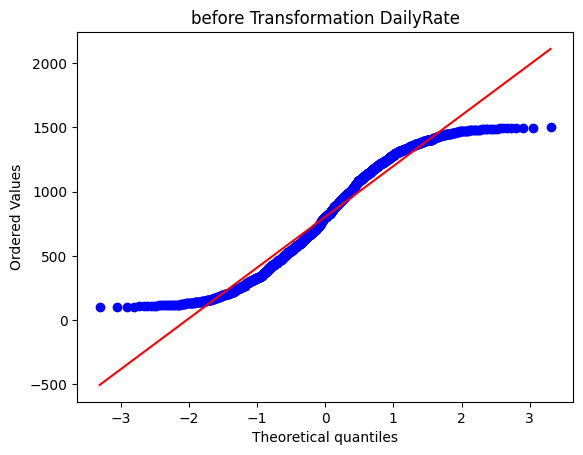

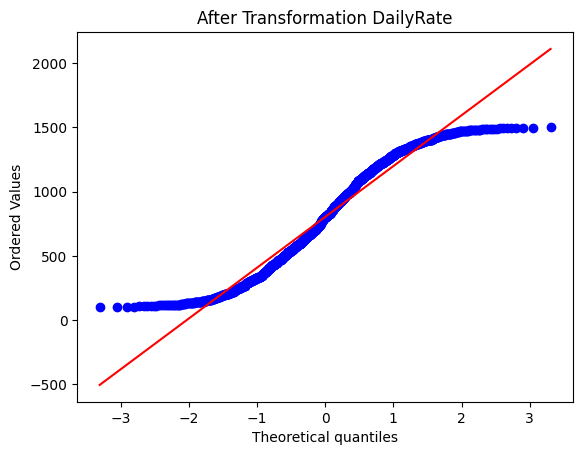

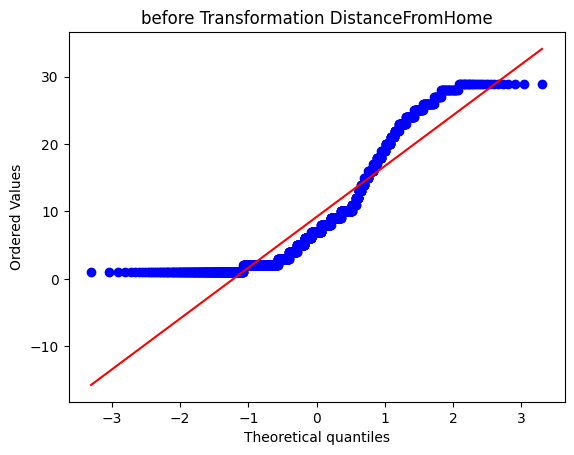

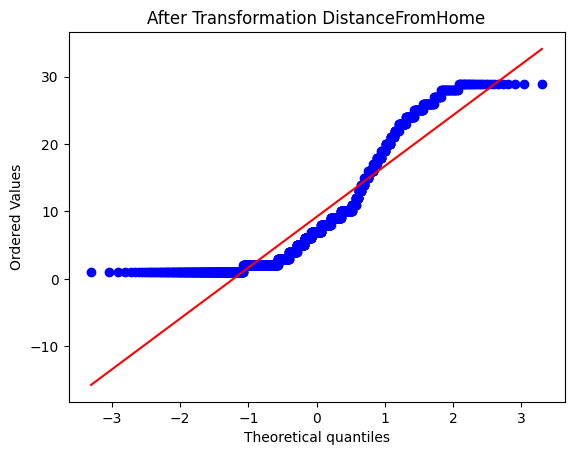

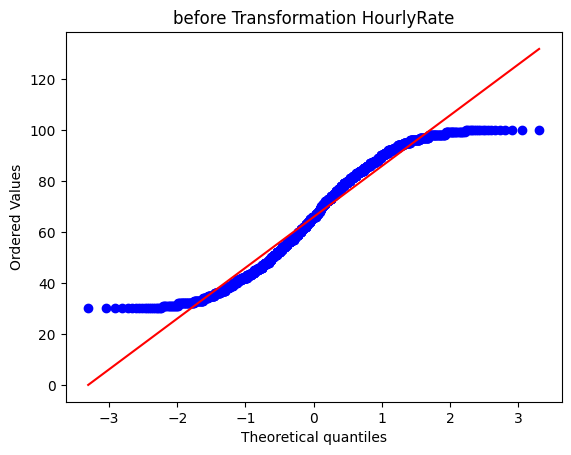

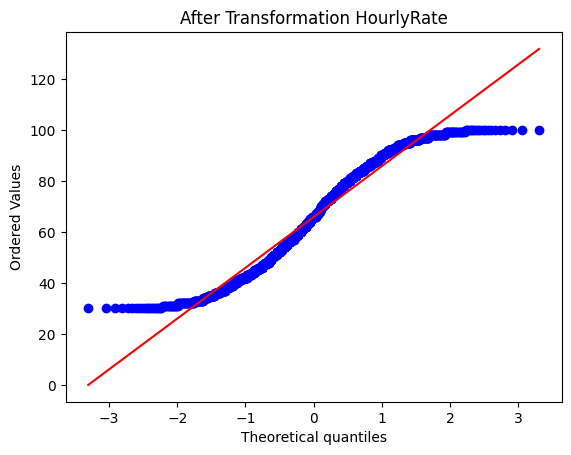

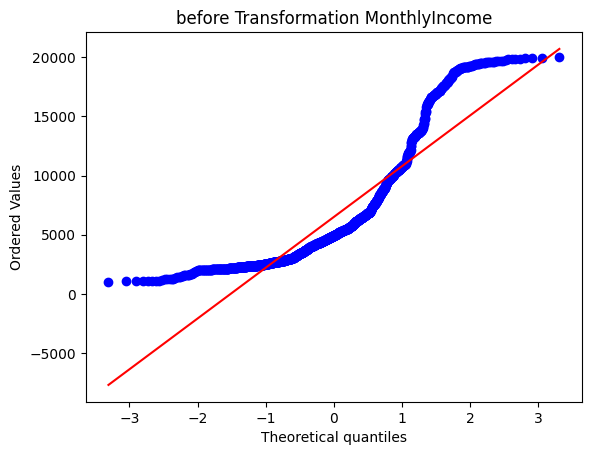

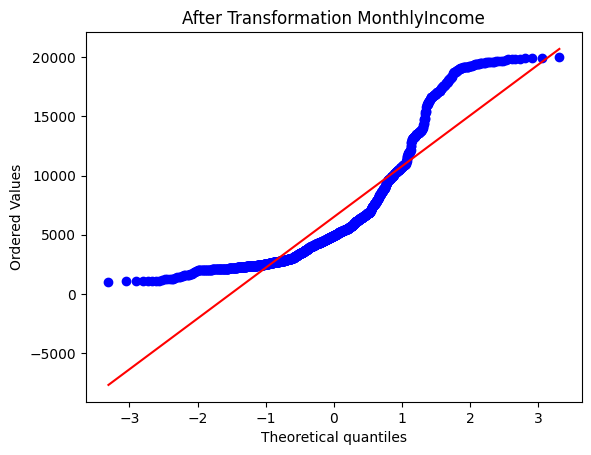

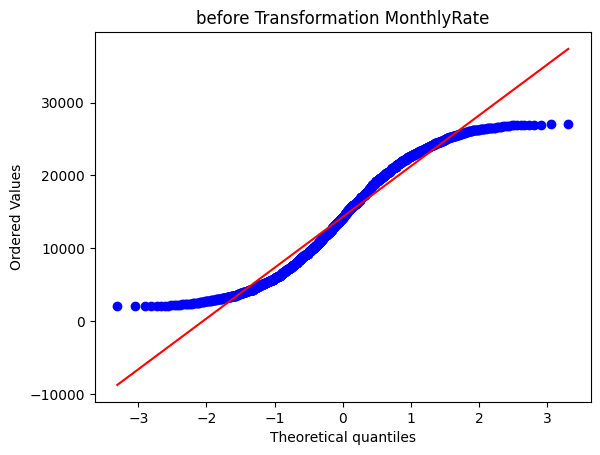

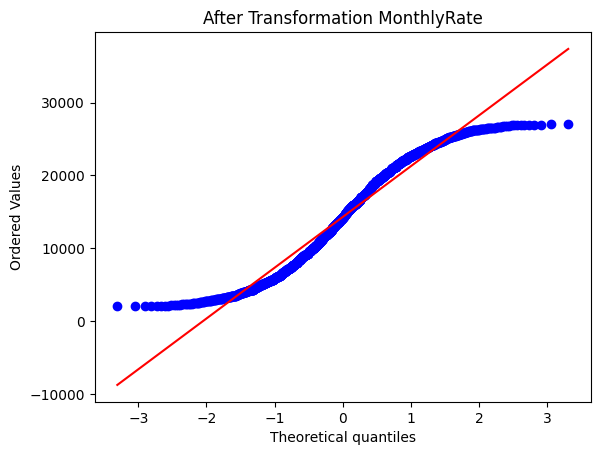

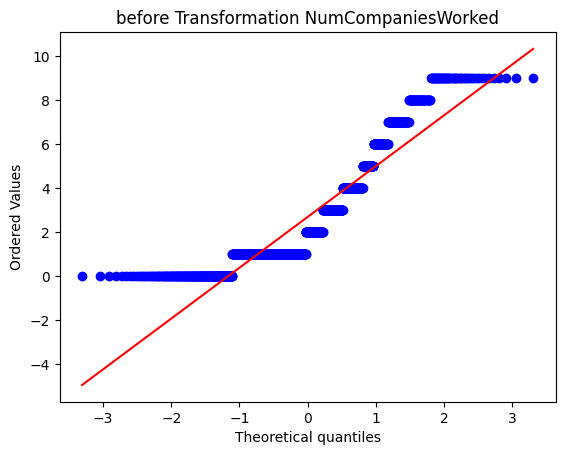

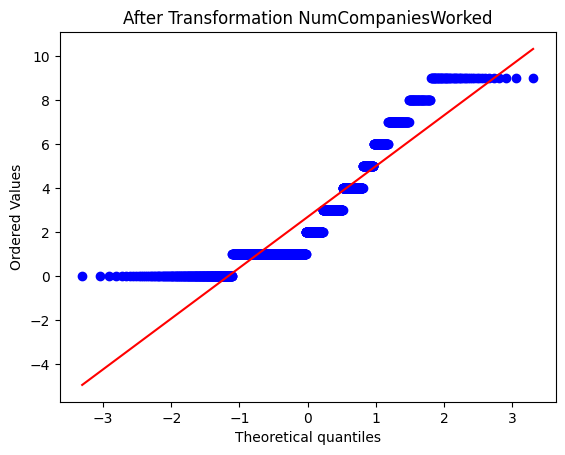

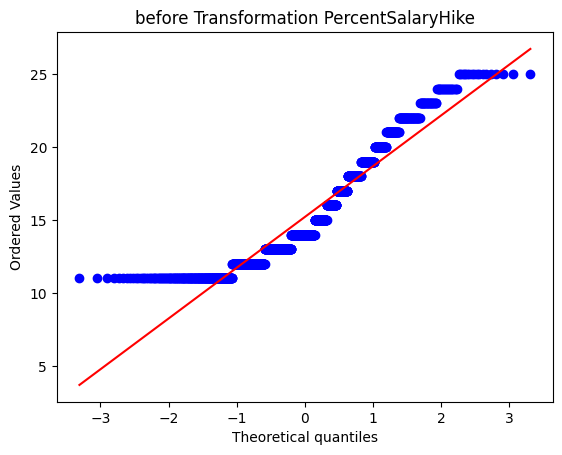

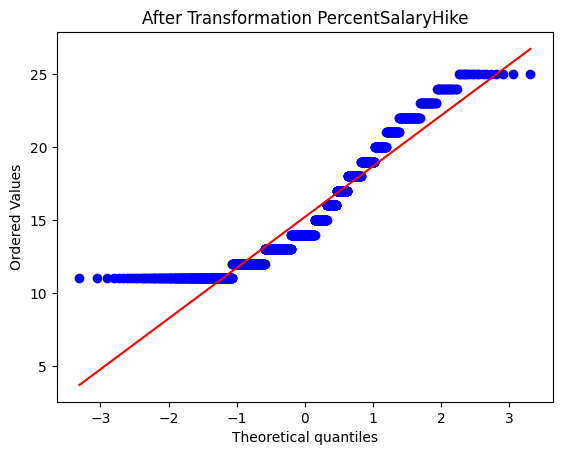

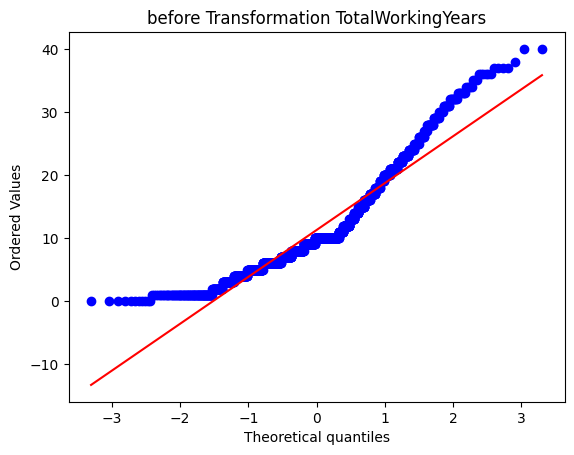

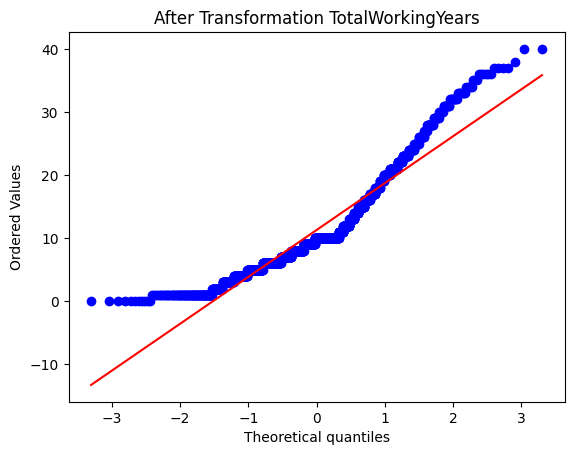

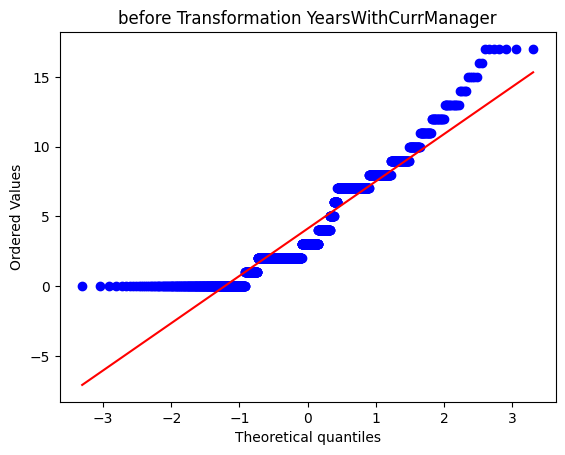

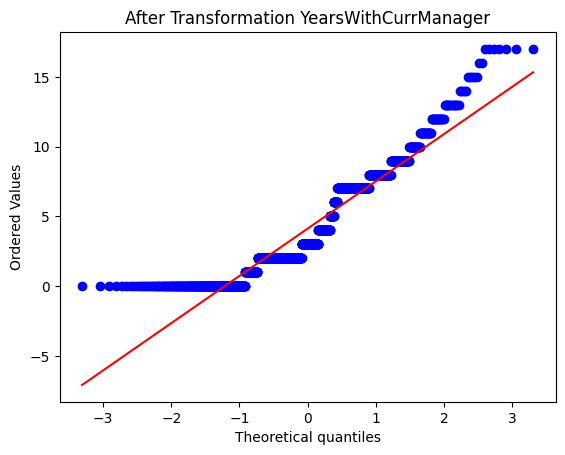

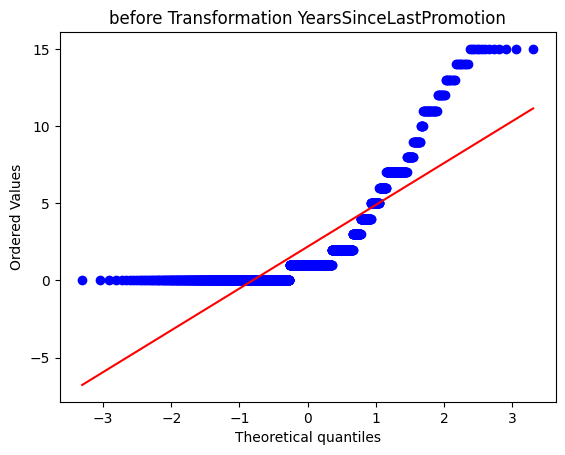

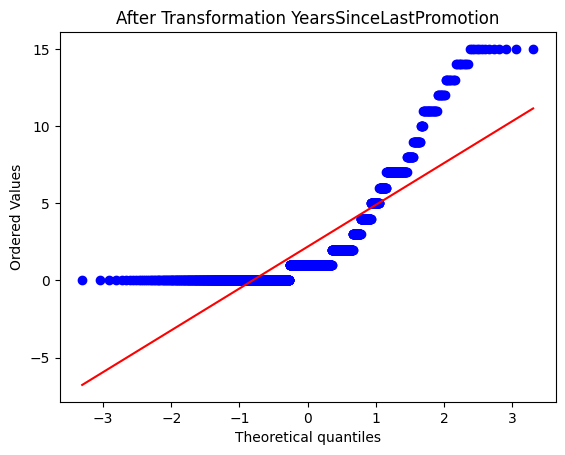

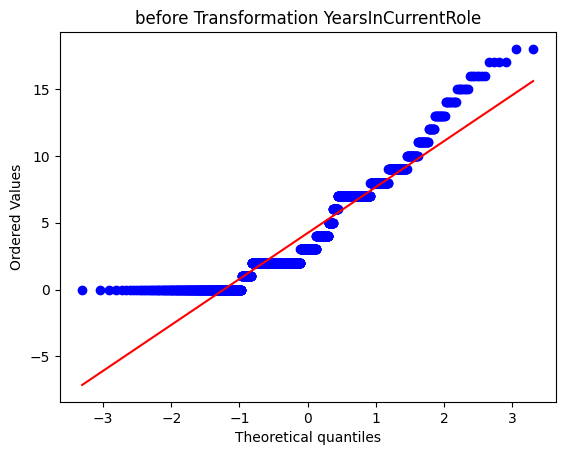

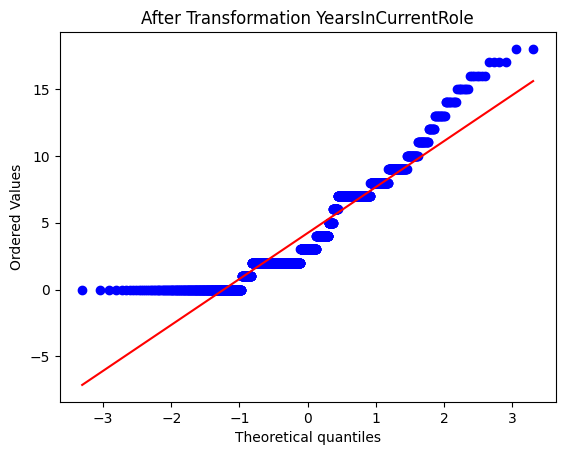

In [49]:
## plotting QQ Plot
num_cols=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
for i in num_cols:
    
    stats.probplot(xn[i],dist='norm',plot=plt)
    plt.title('before Transformation '+i)
    plt.show()
    
    stats.probplot(xd[i],dist='norm',plot=plt)
    plt.title('After Transformation '+i)
    plt.show()

<Figure size 640x480 with 0 Axes>

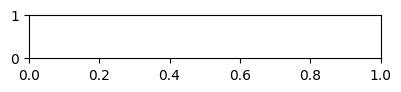

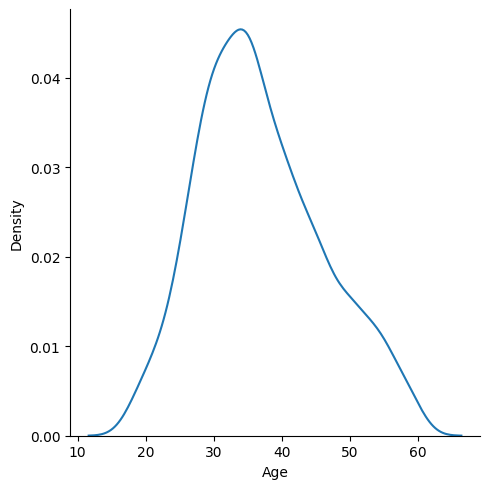

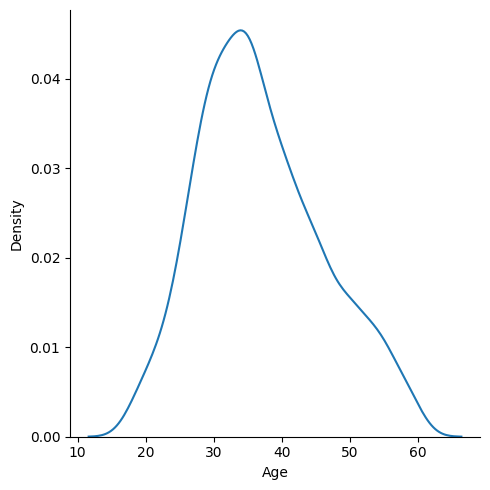

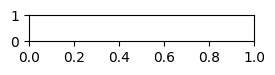

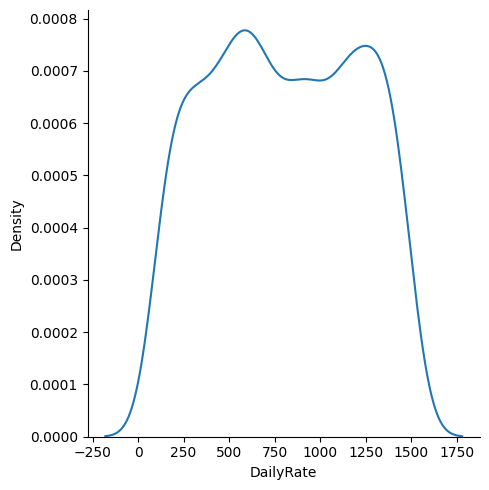

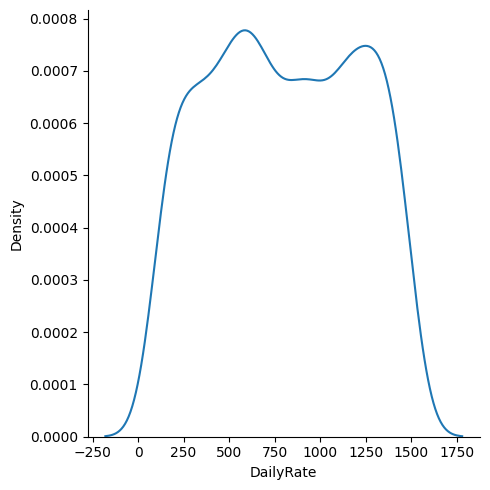

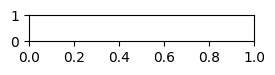

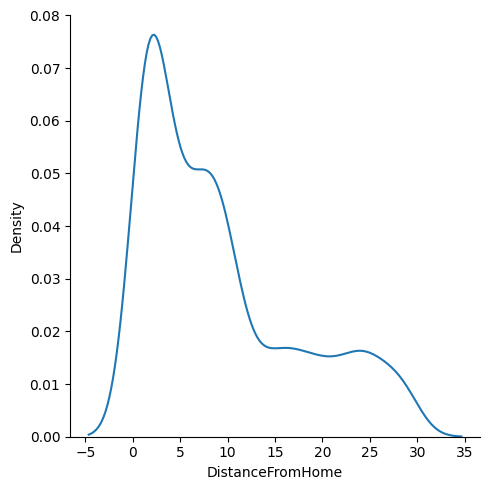

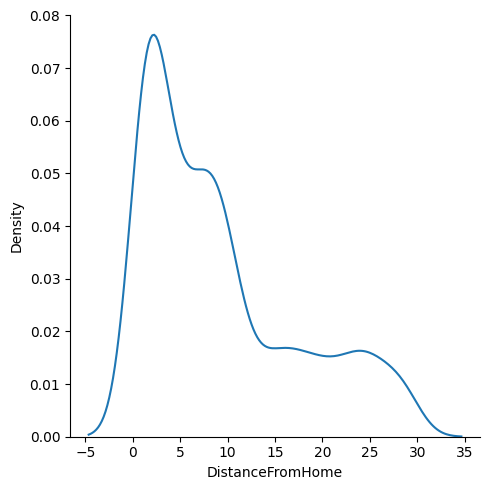

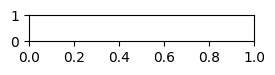

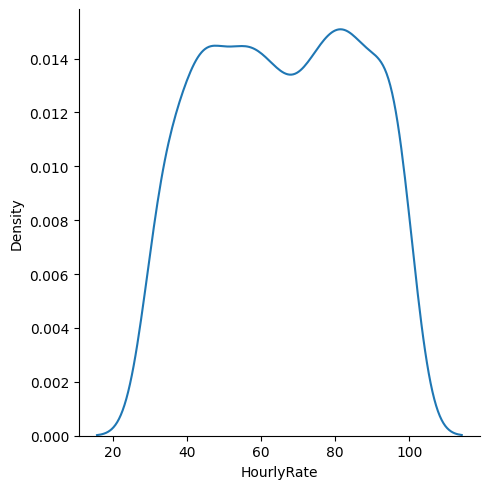

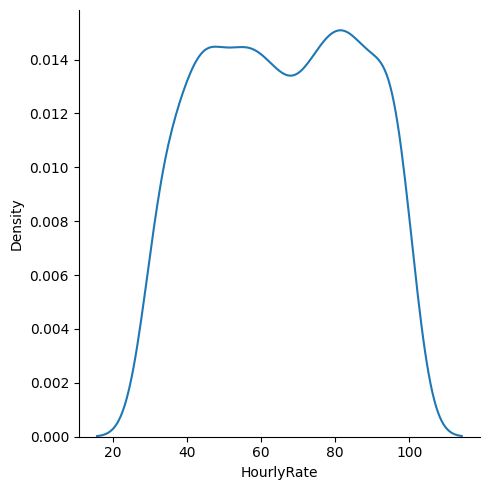

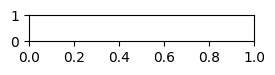

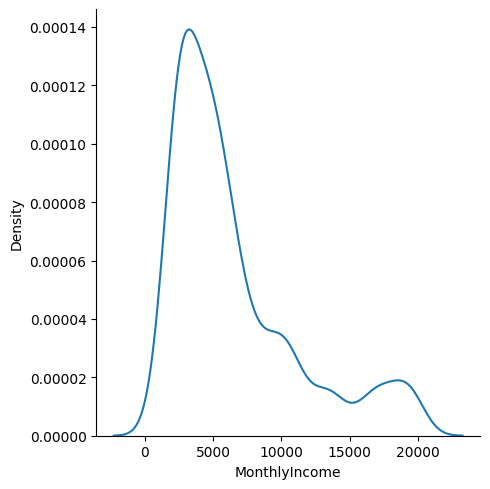

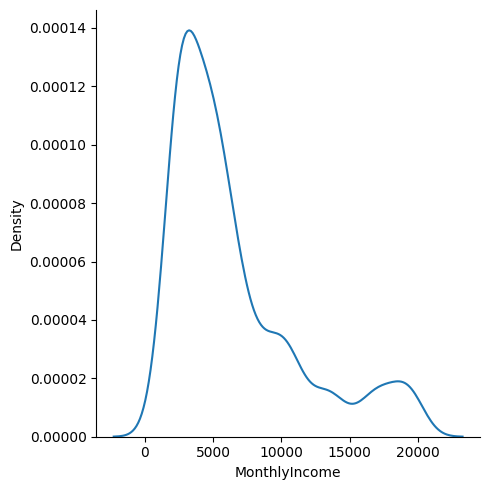

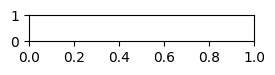

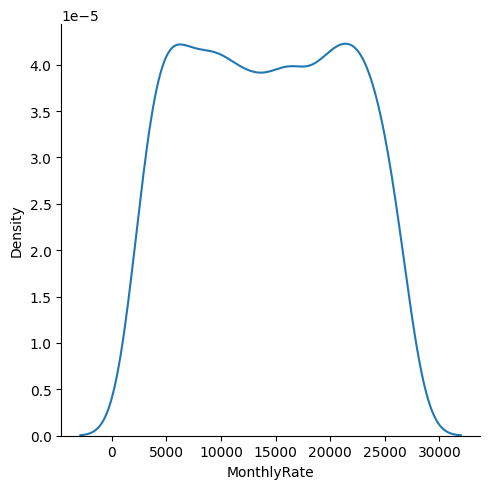

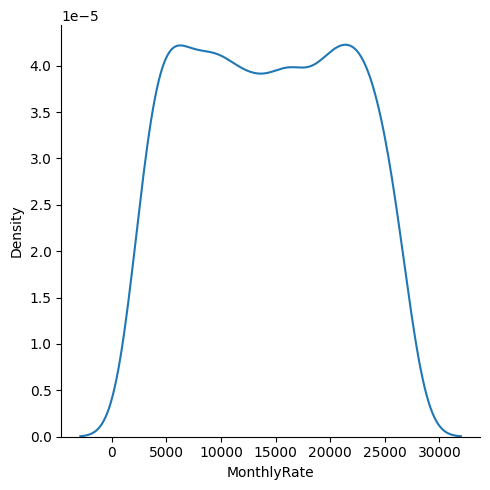

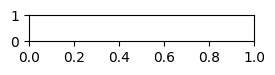

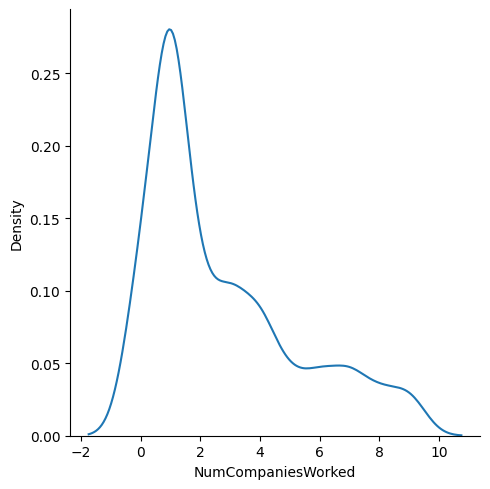

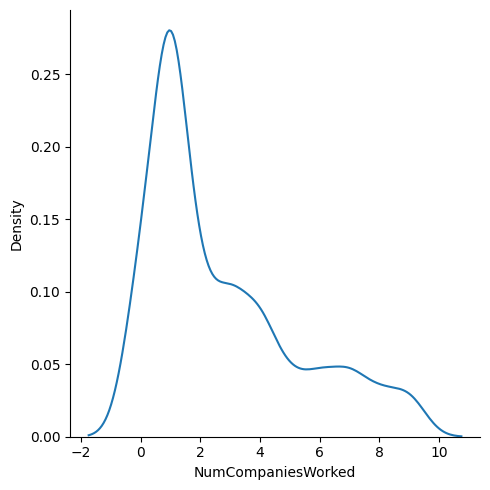

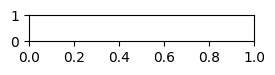

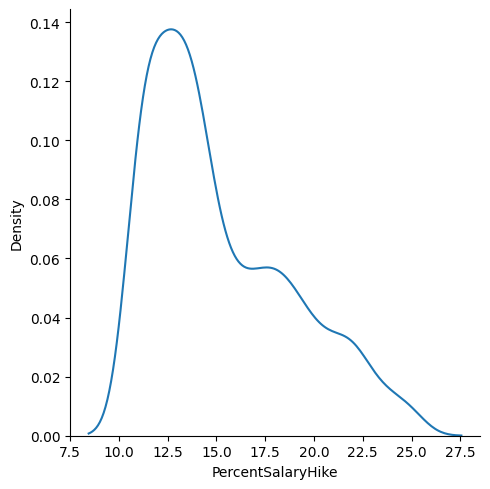

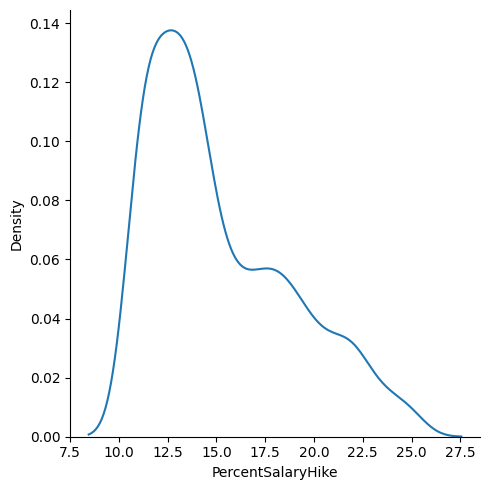

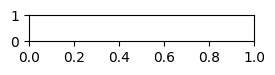

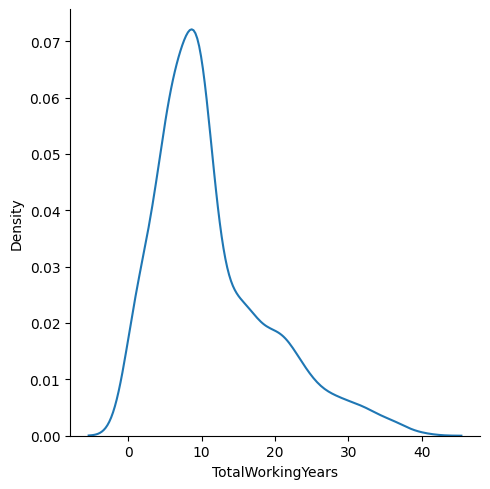

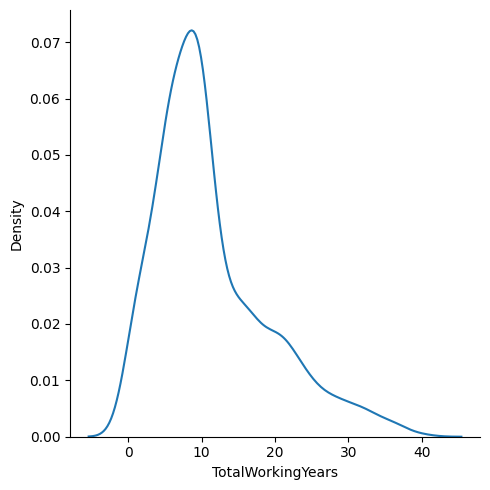

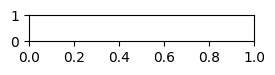

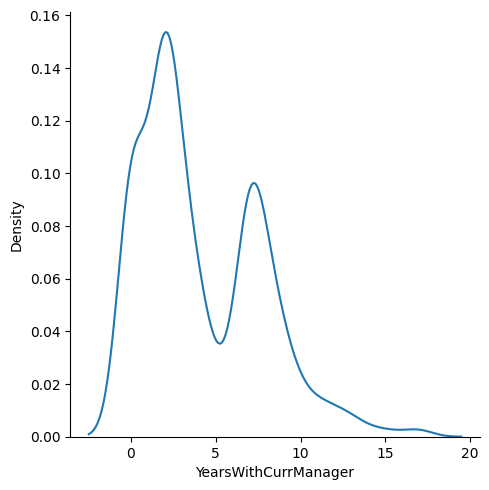

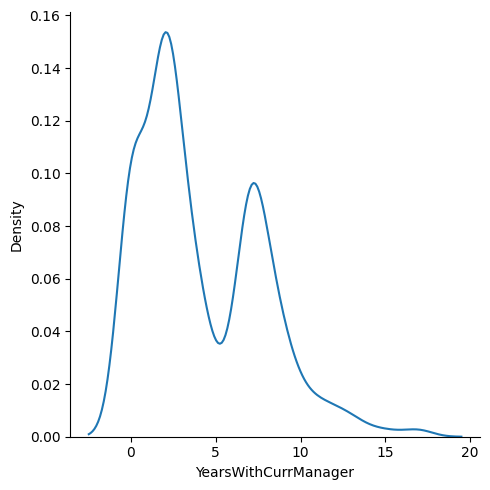

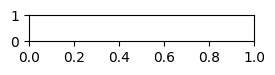

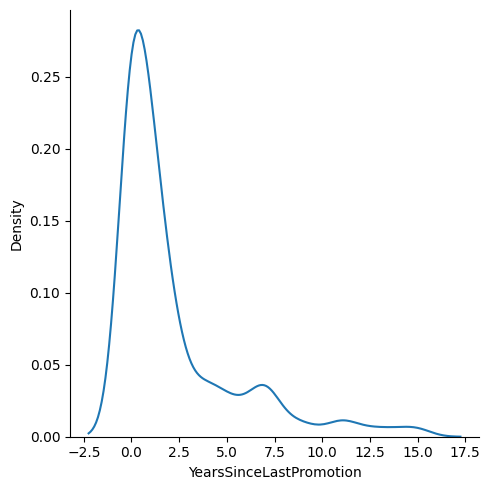

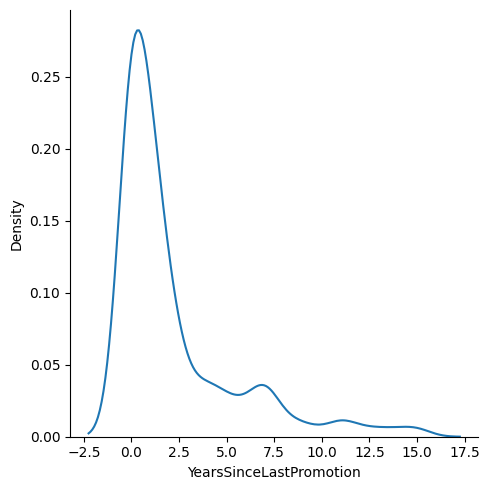

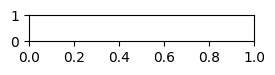

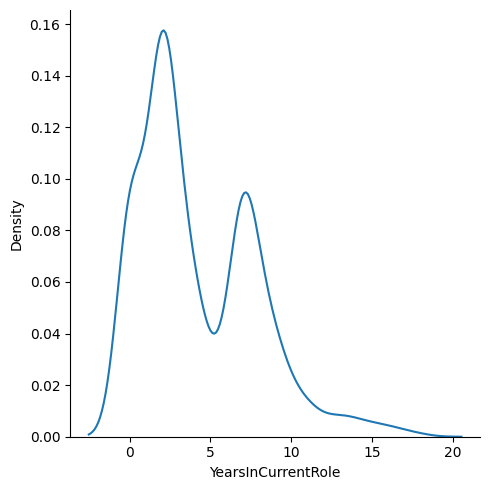

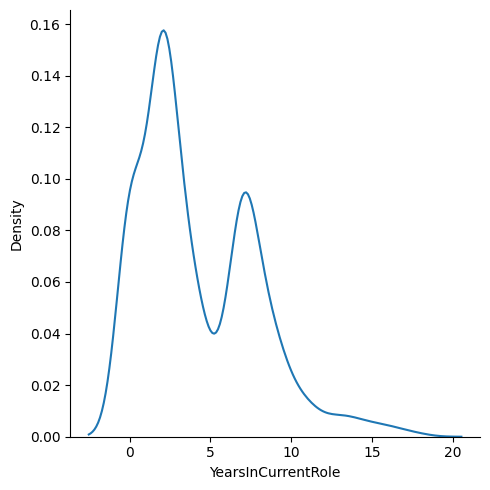

In [71]:
num_cols=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
# fig, axes = plt.subplots(len(num_cols), 2)
count=1
plt.subplots(figsize=(10, 8))
for i in num_cols:
    plt.subplot(len(num_cols),2,count)
    sns.displot(xn[i],kind="kde",ax)
    sns.displot(xd[i],kind="kde")
    count+=1
    
    plt.tight_layout()

    plt.show()

In [ ]:
transform =  ColumnTransformer(transformers=[('